In [1]:
import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

### gaon 데이터

In [2]:
data = pd.read_csv('new_gaon_data.csv', index_col=0)
data

,year,week_num,start_date,end_date,rank,music,singer,album
0,2013,11,2013.03.10,2013.03.16,1,거북이,다비치,Mystic Ballad Part 1
1,2013,11,2013.03.10,2013.03.16,2,눈꽃,거미,"그 겨울, 바람이 분다 OST Part 3"
2,2013,11,2013.03.10,2013.03.16,3,눈꽃,거미,"그 겨울, 바람이 분다 OST Part 3"
3,2013,11,2013.03.10,2013.03.16,4,있다 없으니까,씨스타19,있다 없으니까
4,2013,11,2013.03.10,2013.03.16,5,라면인건가,AKMU (악뮤),SBS K팝 스타 시즌2 TOP 10 Part 1
...,...,...,...,...,...,...,...,...
53695,2023,15,2023.04.09,2023.04.15,100,The Drum,Alan Walker,The Drum
53696,2023,4,2023.01.22,2023.01.28,99,Love War,YENA(최예나),Love War
53697,2023,5,2023.01.29,2023.02.04,99,Love War,YENA(최예나),Love War
53698,2023,4,2023.01.22,2023.01.28,100,The Drum,Alan Walker,The Drum


In [3]:
df = data.copy()

In [4]:
#pd.set_option('display.max_rows', None)

In [4]:
a=data.groupby(['music'])['music'].count().to_dict()  # music끼리 묶어서 세어보기
#b=data.groupby(['music'])['music'].count().to_dict()

In [5]:
test_df1 = pd.DataFrame.from_dict(a, orient='index', columns=['total_counts'])
#test_df2 = pd.DataFrame.from_dict(b, orient='index')
test_df1

,total_counts
#불편해),25
#첫사랑,12
#화이트 스타일,23
%%(응응),29
(Bonus Track) Voice Mail,1
...,...
희맨사항,10
희재,15
흰눈,25
히치하이킹,10


In [6]:
test_df1.reset_index(inplace=True)

In [7]:
# 인덱스 만들어주기
test_df1

,index,total_counts
0,#불편해),25
1,#첫사랑,12
2,#화이트 스타일,23
3,%%(응응),29
4,(Bonus Track) Voice Mail,1
...,...,...
3189,희맨사항,10
3190,희재,15
3191,흰눈,25
3192,히치하이킹,10


In [8]:
#컬럼명 바꾸기(music) -> 위에 index 컬럼을 music으로 변경
test_df1=test_df1.rename(columns={'index':'music'})
test_df1

,music,total_counts
0,#불편해),25
1,#첫사랑,12
2,#화이트 스타일,23
3,%%(응응),29
4,(Bonus Track) Voice Mail,1
...,...,...
3189,희맨사항,10
3190,희재,15
3191,흰눈,25
3192,히치하이킹,10


In [9]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   music         3194 non-null   object
 1   total_counts  3194 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.0+ KB


In [10]:
# merge해서 데이터 합쳐주기
result = pd.merge(df, test_df1, on='music')

In [11]:
result

,year,week_num,start_date,end_date,rank,music,singer,album,total_counts
0,2013,11,2013.03.10,2013.03.16,1,거북이,다비치,Mystic Ballad Part 1,23
1,2013,12,2013.03.17,2013.03.23,5,거북이,다비치,Mystic Ballad Part 1,23
2,2013,12,2013.03.17,2013.03.23,12,거북이,다비치,Mystic Ballad Part 1,23
3,2013,13,2013.03.24,2013.03.30,12,거북이,다비치,Mystic Ballad Part 1,23
4,2013,12,2013.03.17,2013.03.23,16,거북이,다비치,Mystic Ballad Part 1,23
...,...,...,...,...,...,...,...,...,...
53695,2023,2,2023.01.08,2023.01.14,100,The Drum,Alan Walker,The Drum,15
53696,2023,3,2023.01.15,2023.01.21,100,The Drum,Alan Walker,The Drum,15
53697,2023,15,2023.04.09,2023.04.15,100,The Drum,Alan Walker,The Drum,15
53698,2023,4,2023.01.22,2023.01.28,100,The Drum,Alan Walker,The Drum,15


In [12]:
# $$가 인식이 안돼서 replace 함

df.replace({'music': {'ON IT + BO$$': 'ON IT + BOSS'}},inplace=True)

<AxesSubplot:title={'center':'상위 music 100개'}>

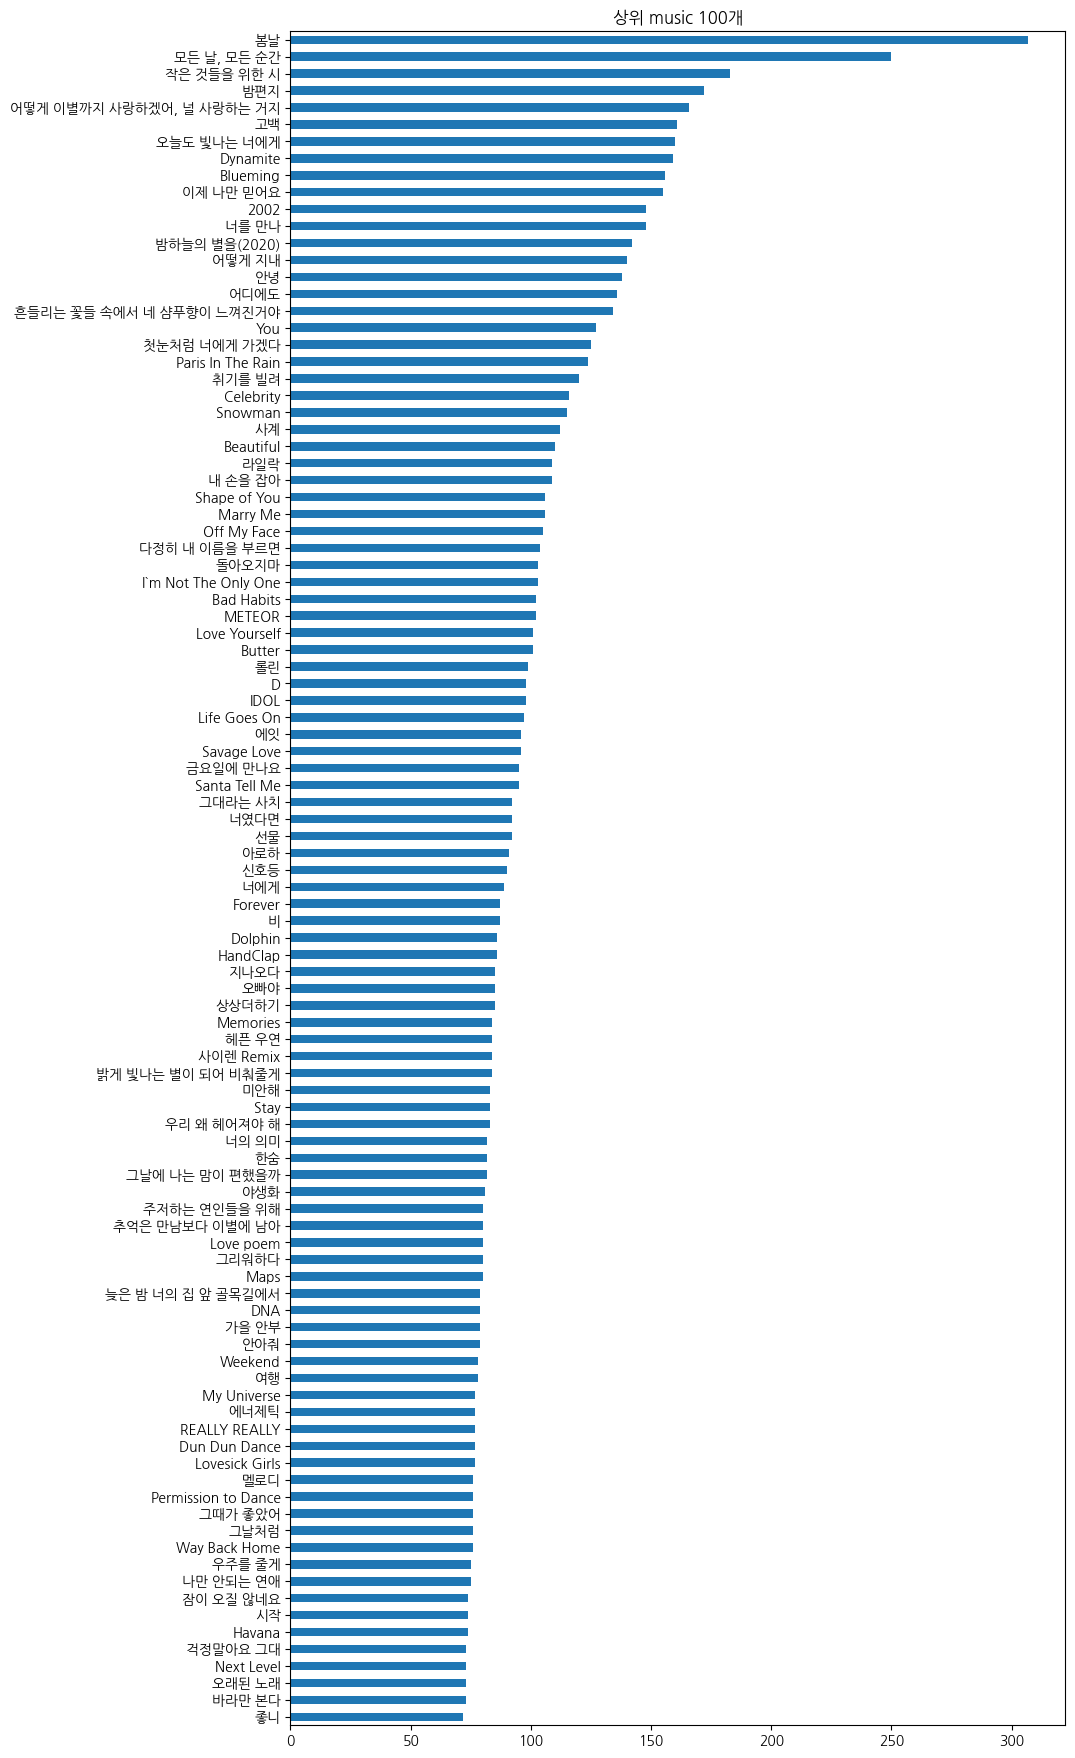

In [13]:
# music 컬럼에서 갯수 세고 상위 100개 정렬

music_100 = df['music'].value_counts().head(100).sort_values()
music_100.plot.barh(figsize=(10,22), title="상위 music 100개")

<AxesSubplot:title={'center':'상위 가수 100명'}>

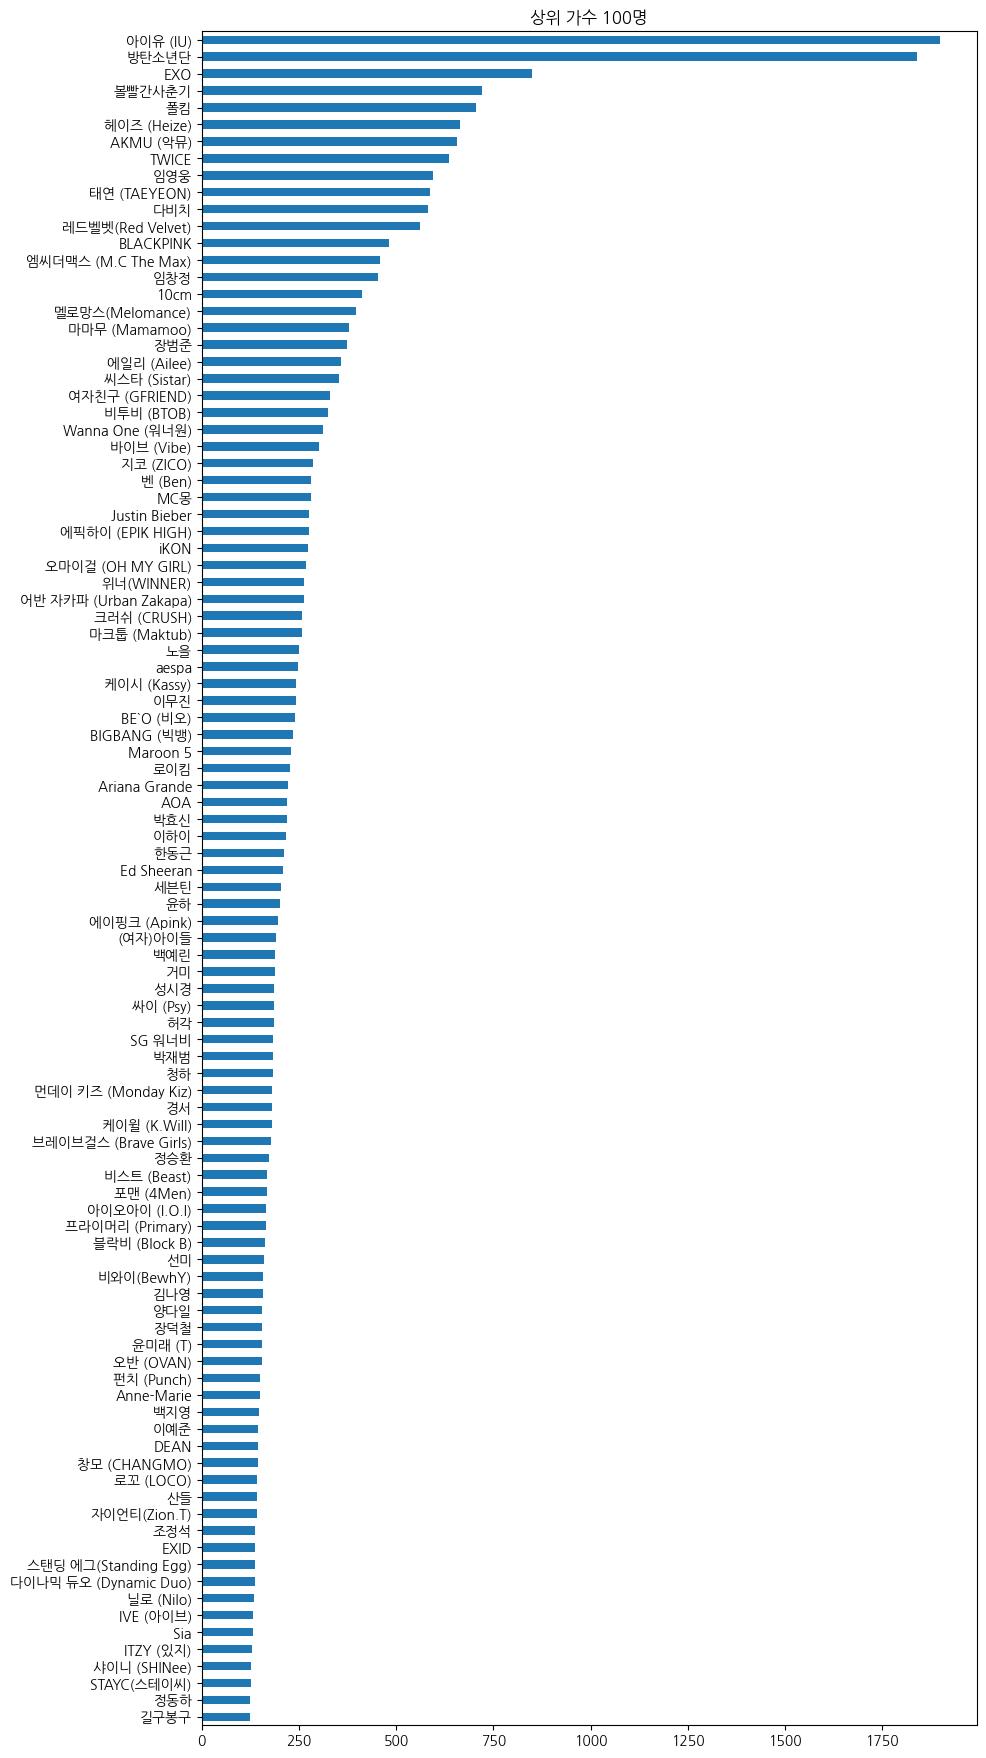

In [14]:
# singer 칼럼에서 갯수 세고 상위 100개 정렬

singer_100 = df['singer'].value_counts().head(100).sort_values()
singer_100.plot.barh(figsize=(10,22), title="상위 가수 100명")

### melon

In [13]:
melon_2015 = pd.read_csv('C:/Users/zzzzz/신한ai/data/melon_2015_2023/melon_2015.csv')
melon_2016 = pd.read_csv('C:/Users/zzzzz/신한ai/data/melon_2015_2023/melon_2016.csv')
melon_2017 = pd.read_csv('C:/Users/zzzzz/신한ai/data/melon_2015_2023/melon_2017.csv')

In [14]:
melon_2015

,music,singer,release_date,category,music_like,movie_like,movie_views
0,팔베개,"소유, 기리보이",2015.01.15,랩/힙합,49679,NaN,NaN
1,표적,신화,2015.02.26,댄스,21363,3796.0,413254.0
2,목소리,노을,2015.01.08,발라드,57220,488.0,213821.0
3,위아래,EXID,2014.08.27,댄스,76205,3486.0,5814486.0
4,이별공식,빅스(VIXX),2015.02.24,댄스,35291,3601.0,323028.0
...,...,...,...,...,...,...,...
241,어느 멋진 날,정용화(Jung Yong Hwa),2018.11.07,발라드,321,NaN,NaN
242,드라마,나인 뮤지스,2014.08.07,국내드라마,46,NaN,NaN
243,My Love,에디킴,2015.01.21,포크/블루스,21869,538.0,111081.0
244,두 여자의 방,다비치,2015.01.21,발라드,9318,NaN,NaN


### 2016 melon 장르 카테고리

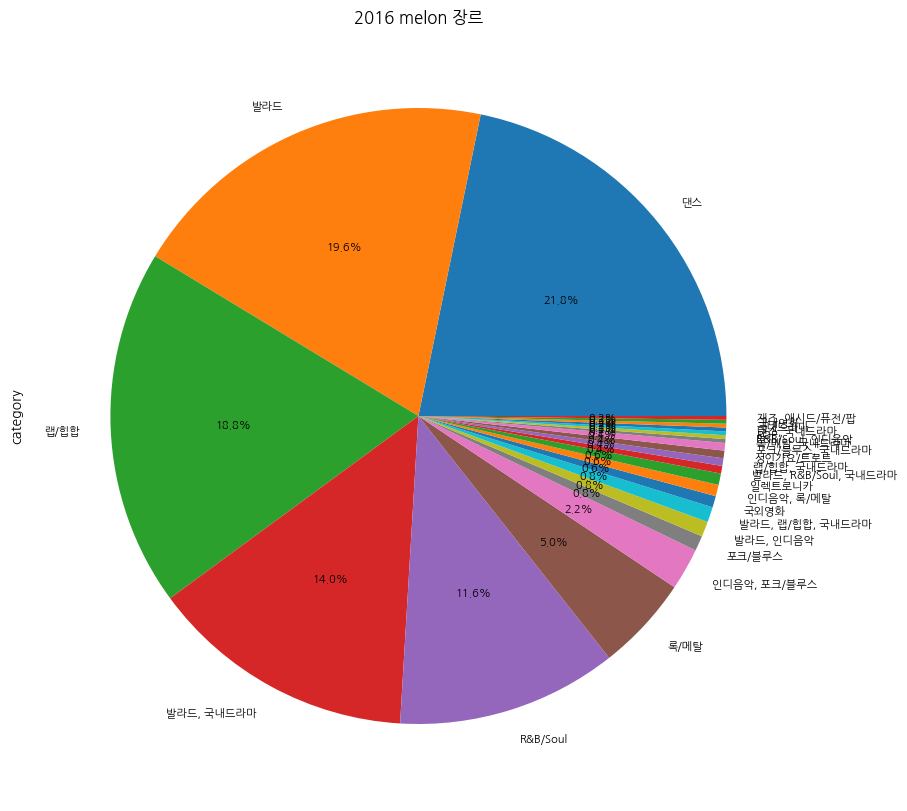

In [15]:
plt.figure(figsize=(10,10))

plt.title('2016 melon 장르')

melon_2016['category'].value_counts().plot.pie(autopct = '%1.1f%%', 
                                         textprops = {'fontsize' : 8})

plt.show()

In [2]:
melon_data = pd.read_csv('C:/Users/zzzzz/신한ai/data/melon_data.csv',index_col=0)
melon_data

,music,singer,release_date,category,music_like,movie_like,movie_views,Unnamed: 0
0,모노드라마,"허각, 유승우",2013.02.05,발라드,87466,181.0,220476.0,NaN
1,라면인건가,AKMU,2013.02.17,포크/블루스,36725,NaN,NaN,NaN
2,있다 없으니까,씨스타19,2013.01.31,댄스,56138,441.0,629192.0,NaN
3,눈꽃,거미,2013.02.27,"발라드, 국내드라마",52474,NaN,NaN,NaN
4,거북이,다비치,2013.03.04,발라드,92257,587.0,208556.0,NaN
...,...,...,...,...,...,...,...,...
3838,Cookie,NewJeans,2022.08.01,댄스,133714,3171.0,152708.0,NaN
3839,Teddy Bear,STAYC(스테이씨),2023.02.14,댄스,84132,707.0,64019.0,NaN
3840,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",260608,NaN,NaN,NaN
3841,풍등,이찬원,2023.02.20,성인가요/트로트,12873,3770.0,20260.0,NaN


In [3]:
melon_data = melon_data.drop(columns='Unnamed: 0')

In [4]:
melon_data

,music,singer,release_date,category,music_like,movie_like,movie_views
0,모노드라마,"허각, 유승우",2013.02.05,발라드,87466,181.0,220476.0
1,라면인건가,AKMU,2013.02.17,포크/블루스,36725,NaN,NaN
2,있다 없으니까,씨스타19,2013.01.31,댄스,56138,441.0,629192.0
3,눈꽃,거미,2013.02.27,"발라드, 국내드라마",52474,NaN,NaN
4,거북이,다비치,2013.03.04,발라드,92257,587.0,208556.0
...,...,...,...,...,...,...,...
3838,Cookie,NewJeans,2022.08.01,댄스,133714,3171.0,152708.0
3839,Teddy Bear,STAYC(스테이씨),2023.02.14,댄스,84132,707.0,64019.0
3840,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",260608,NaN,NaN
3841,풍등,이찬원,2023.02.20,성인가요/트로트,12873,3770.0,20260.0


In [5]:
melon_data = melon_data.fillna(0)

In [6]:
melon_data.isnull().sum()

music           0
singer          0
release_date    0
category        0
music_like      0
movie_like      0
movie_views     0
dtype: int64

In [7]:
melon_data['new_category'] = melon_data.category.str.split(", 국내드라마").str[0]
melon_data

,music,singer,release_date,category,music_like,movie_like,movie_views,new_category
0,모노드라마,"허각, 유승우",2013.02.05,발라드,87466,181.0,220476.0,발라드
1,라면인건가,AKMU,2013.02.17,포크/블루스,36725,0,0,포크/블루스
2,있다 없으니까,씨스타19,2013.01.31,댄스,56138,441.0,629192.0,댄스
3,눈꽃,거미,2013.02.27,"발라드, 국내드라마",52474,0,0,발라드
4,거북이,다비치,2013.03.04,발라드,92257,587.0,208556.0,발라드
...,...,...,...,...,...,...,...,...
3838,Cookie,NewJeans,2022.08.01,댄스,133714,3171.0,152708.0,댄스
3839,Teddy Bear,STAYC(스테이씨),2023.02.14,댄스,84132,707.0,64019.0,댄스
3840,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",260608,0,0,발라드
3841,풍등,이찬원,2023.02.20,성인가요/트로트,12873,3770.0,20260.0,성인가요/트로트


In [8]:
melon_data['OST'] = None

In [9]:
#category에 국내드라마 가 있으면 , drama 컬럼에 1을 줌
#category에 국내드라마 가 없으면 , drama 컬럼에 0을 줌

melon_data.loc[melon_data['category'].str.contains('국내드라마') == True, 'OST'] = 1

melon_data.loc[melon_data['category'].str.contains('국내드라마') == False, 'OST'] = 0

In [10]:
melon_data.drop(columns=['category'], inplace=True)

#이전 카테고리 삭제

In [11]:
melon_data

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
0,모노드라마,"허각, 유승우",2013.02.05,87466,181.0,220476.0,발라드,0
1,라면인건가,AKMU,2013.02.17,36725,0,0,포크/블루스,0
2,있다 없으니까,씨스타19,2013.01.31,56138,441.0,629192.0,댄스,0
3,눈꽃,거미,2013.02.27,52474,0,0,발라드,1
4,거북이,다비치,2013.03.04,92257,587.0,208556.0,발라드,0
...,...,...,...,...,...,...,...,...
3838,Cookie,NewJeans,2022.08.01,133714,3171.0,152708.0,댄스,0
3839,Teddy Bear,STAYC(스테이씨),2023.02.14,84132,707.0,64019.0,댄스,0
3840,너의 모든 순간,성시경,2014.02.12,260608,0,0,발라드,1
3841,풍등,이찬원,2023.02.20,12873,3770.0,20260.0,성인가요/트로트,0


In [13]:
melon_data[melon_data['new_category']=='-']

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
2405,music,singer,release_date,music_like,movie_like,movie_views,category,0


In [14]:
melon_data.drop(index=2405, axis=0, inplace=True)
melon_data

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
0,모노드라마,"허각, 유승우",2013.02.05,87466,181.0,220476.0,발라드,0
1,라면인건가,AKMU,2013.02.17,36725,0,0,포크/블루스,0
2,있다 없으니까,씨스타19,2013.01.31,56138,441.0,629192.0,댄스,0
3,눈꽃,거미,2013.02.27,52474,0,0,발라드,1
4,거북이,다비치,2013.03.04,92257,587.0,208556.0,발라드,0
...,...,...,...,...,...,...,...,...
3838,Cookie,NewJeans,2022.08.01,133714,3171.0,152708.0,댄스,0
3839,Teddy Bear,STAYC(스테이씨),2023.02.14,84132,707.0,64019.0,댄스,0
3840,너의 모든 순간,성시경,2014.02.12,260608,0,0,발라드,1
3841,풍등,이찬원,2023.02.20,12873,3770.0,20260.0,성인가요/트로트,0


In [15]:
melon_data.reset_index(drop=True,inplace=True)
melon_data

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
0,모노드라마,"허각, 유승우",2013.02.05,87466,181.0,220476.0,발라드,0
1,라면인건가,AKMU,2013.02.17,36725,0,0,포크/블루스,0
2,있다 없으니까,씨스타19,2013.01.31,56138,441.0,629192.0,댄스,0
3,눈꽃,거미,2013.02.27,52474,0,0,발라드,1
4,거북이,다비치,2013.03.04,92257,587.0,208556.0,발라드,0
...,...,...,...,...,...,...,...,...
3837,Cookie,NewJeans,2022.08.01,133714,3171.0,152708.0,댄스,0
3838,Teddy Bear,STAYC(스테이씨),2023.02.14,84132,707.0,64019.0,댄스,0
3839,너의 모든 순간,성시경,2014.02.12,260608,0,0,발라드,1
3840,풍등,이찬원,2023.02.20,12873,3770.0,20260.0,성인가요/트로트,0


In [16]:
melon_data['new_category'].value_counts()

발라드                      1357
댄스                        850
랩/힙합                      634
R&B/Soul                  344
록/메탈                      201
POP                        89
인디음악, 포크/블루스               69
포크/블루스                     58
발라드, 인디음악                  33
인디음악, 록/메탈                 33
일렉트로니카                     24
성인가요/트로트                   23
R&B/Soul, 인디음악             13
발라드, R&B/Soul              13
랩/힙합, 인디음악                 13
-                          11
POP, 국외영화                  10
POP, 애니메이션/웹툰, 키즈, 만화       9
국내드라마                       8
발라드, 랩/힙합                   7
록/메탈, 국외영화                  6
국내영화                        5
인디음악, 일렉트로니카                5
국외영화                        3
발라드, 록/메탈                   3
발라드, 국내영화                   3
재즈, 애시드/퓨전/팝                2
댄스, 랩/힙합                    2
뮤직테라피                       2
클래식, 크로스오버                  2
뉴에이지                        2
댄스, 게임                      1
월드뮤직, 중국음악                  1
POP, 록/메탈,

In [21]:
melon_data[melon_data['new_category']=='뮤직테라피']

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
596,매일 매일 매일,어반 자카파,2020.12.02,29,0,0,뮤직테라피,0
623,위로,어반 자카파,2021.02.23,0,0,0,뮤직테라피,0


In [23]:
melon_data[500:550]

,music,singer,release_date,music_like,movie_like,movie_views,new_category,OST
500,It`s Christmas Day,로이킴,2014.12.19,10716,822.0,66327.0,포크/블루스,0
501,하나뿐인 사람,케이윌,2014.12.18,19826,0,0,발라드,1
502,청춘연가,넬,2014.12.15,22677,990.0,75828.0,록/메탈,0
503,마음대로,이진아,2014.12.14,18608,0,0,발라드,0
504,The Christmas Song,성시경,2002.11.26,28,0,0,-,0
505,Jingle Bells,성시경,2014.12.09,1440,0,0,발라드,0
506,White Christmas,성시경,2004.11.24,1307,0,0,-,0
507,I`ll Be Home For Christmas,성시경,2014.12.09,1574,0,0,발라드,0
508,Sleigh Ride,성시경,2014.12.09,1930,0,0,발라드,0
509,반대로만 살자.,V.O.S,2015.03.11,363,0,0,발라드,0


In [18]:
melon_data.loc[70, 'new_category'] = '록'
melon_data.loc[266, 'new_category'] = '댄스'
melon_data.loc[450, 'new_category'] = '댄스'
melon_data.loc[504, 'new_category'] = '발라드'
melon_data.loc[506, 'new_category'] = '록'

In [15]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le = le.fit(melon_data['new_category'])   #train['col']을 fit
# melon_data['new_category'] = le.transform(melon_data['new_category'])   #train['col']에 따라 encoding
# #test['col'] = le.transform(test['col'])   #train['col']에 따라 encoding

In [ ]:
pd.get_dummies(melon_data['new_category'], dummy_na=True)